# Simple Linear Regression

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Reading the Dataset

In [6]:
import pandas as pd
df=pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2 : Performing Basic Data Quality Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [10]:
df.duplicated().sum()

0

### Step 3 : RND vs PROFIT Model

<Axes: xlabel='RND', ylabel='PROFIT'>

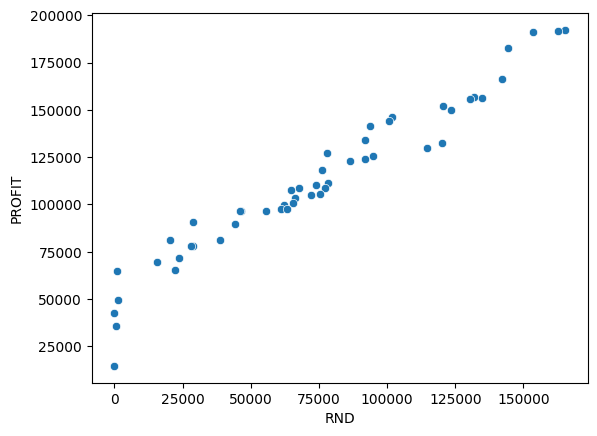

In [12]:
import seaborn as sns
sns.scatterplot(data=df, x='RND', y='PROFIT')

### PROFIT ~ RND

In [13]:
x=df[['RND']]
y=df[['PROFIT']]

In [15]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [16]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

### Getting slope and intercept

In [19]:
model.intercept_

array([49032.89914125])

In [21]:
model.coef_

array([[0.85429137]])

### Equation : PROFIT_Predicted = 0.8543*RND + 49032.90

### Evaluating the Model 

In [23]:
# R2 Score
model.score(x,y)

0.9465353160804393

### With above I can say model has good R2 score of 0.9465 > 0.8 hence model is good.

In [26]:
# Predicting the values of Profit for given x
ypred = model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [27]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,\
                            mean_absolute_percentage_error,r2_score

In [29]:
mse=mean_squared_error(y,ypred)
mse

85120931.32706906

In [31]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [32]:
mae = mean_absolute_error(y,ypred)
mae

6910.98435457961

In [34]:
mape = mean_absolute_percentage_error(y,ypred)
mape

0.11070141081984847

In [35]:
r2 = r2_score(y,ypred)
r2

0.9465353160804393

### Visualizing  the fit

<Axes: xlabel='RND', ylabel='PROFIT'>

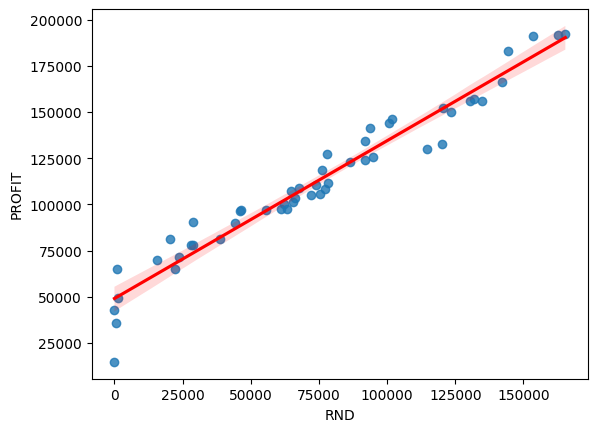

In [39]:
sns.regplot(data = df, x='RND',y='PROFIT', line_kws={'color':'Red'})

### Out of Sample Prediction

#### Estimating Profit

In [41]:
rnd_new=[[100000]]
model.predict(rnd_new)

array([[134462.03623513]])